<a href="https://colab.research.google.com/github/Muriloozol/student_tests_data_analysis/blob/master/student_intervention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System


### ***Bruno Martins, Helena Borges and Murilo Ozol***

# Project Description

A local school district has a goal to reach a 95% graduation rate by the end of the decade by identifying students who need intervention before they drop out of school. As a software engineer contacted by the school district, your task is to model the factors that predict how likely a student is to pass their high school final exam, by constructing an intervention system that leverages supervised learning techniques. The board of supervisors has asked that you find the most effective model that uses the least amount of computation costs to save on the budget. You will need to analyze the dataset on students' performance and develop a model that will predict the likelihood that a given student will pass, quantifying whether an intervention is necessary.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer:** It's a classification algorithm, because we want to predict if a given student will "pass" or "fail", according to the likelihood.

## Exploring the Data

First we need to import all the libraries that we will use for our project.
The last column from the dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [0]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Read student data
student_data = pd.read_csv("student-data.csv")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [0]:
# Calculate number of students
n_students = len(student_data.index)

# Calculate number of features
n_features = len(student_data.columns)

# Calculate passing students
n_passed = student_data[student_data['passed']=='yes'].shape[0]

# Calculate failing students
n_failed = student_data[student_data['passed']=='no'].shape[0]

# Calculate graduation rate
grad_rate = n_passed/n_students * 100

# # Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print( "Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identifing feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Here we will split the data into target (`y_all`) and feature data (`X_all`).

In [0]:
# Separating the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data.drop('passed', axis=1)
y_all = student_data['passed']

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that we need to convert! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [0]:
def preprocess_features(X:pd.DataFrame):
    '''
    Preprocesses the student data and converts non-numeric binary variables into
    binary (0/1) variables. Converts categorical variables into dummy variables.

    Parameters
    ----------
      X: pd.DataFrame
        DataFrame that contains the features with categorial variables

    Returns
    -------
      output: pd.DataFrame
        DataFrame with dummy variables
    '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix=col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)

le = LabelEncoder().fit(['yes', 'no']) # Fit does nothing
y_all = le.transform(y_all)

### Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, we will implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the functions.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [0]:
# Set the number of training points
num_train = 300

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, 
                                                    y_all,
                                                    train_size=num_train,
                                                    random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, we will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html):
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer:** The models was chosen are: *Decision Trees*, *Random Forest* and *Support Vector Machines*.

The *Decision Trees* could to use in such as assist in the allocation of newly received orders in a manufacturing network. While than *Random Forest* could be applied to industry is to take various product property variables and use a random forest to indicate potential customer interest and to fabric wines eith this properties. And finally, the *Support Vector Machines* could be used for Generalized predictive control(GPC), using SVM based GPC to control chaotic dynamics with useful parameters.

> *Decision Trees*: the strengths of the models are, firstly, a perform very well in practice and also, they are robust to outliers, scalable, and able to naturally model non-linear decision boundaries thanks to their hierarchical structure. In compensation, the weaknesses are that individual trees proning to overfitting, but this can be alleviated by ensemble methods.

> *SVM*: This machine learning algorithm facilitate modeling for data analysis through regression and classification. Also, It's fairly robust against overfitting, especially in high-dimensional space. In compensation, is more difficult to tune due to the importance of picking the right kernel, and don't scale well to larger datasets.

> *Random Forest*: Similar the Decision Tress, but random forest model takes the average results for each decision tree, and therefore sophisticated predictive results.


References: https://elitedatascience.com/machine-learning-algorithms#classification

https://www.techopedia.com/how-might-companies-use-random-forest-models-for-predictions/7/32995





### Model Performance Metrics
We will now import the three supervised learning models of our choice. We will train and predict on each classifier for three different training set sizes: 100, 200, and 300. In the following code cell, we will implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models.
 - Use a `random_state` for each model, if provided.
 - **Note:** First we will use the default settings for each model and tune them further.
- Create the different training set sizes to be used to train each model.
- Fit each model with each training set size and make predictions on the test set (9 in total).
- Use F<sub>1</sub> score to compare the results.

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Initialize the three models
tree = DecisionTreeClassifier(min_samples_split=0.05, random_state=42)
svc = SVC(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

model_set = [('DecisionTreeClassifier',tree),
             ('SVC',svc),
             ('RandomForestClassifier',random_forest)]

train_set = [(X_train_100, y_train_100),
             (X_train_200, y_train_200),
             (X_train_300, y_train_300)]

# Create a DataFrame to hold the results
answer_df = pd.DataFrame(columns=['Training Set Size',
                                  'Training Time',
                                  'Prediction Time:',
                                  'F1 Score(train)',
                                  'F1 Score(test)'])

# Iterate over the models
for name, model in model_set:
    # Iterate over the training sets
    for X, y in train_set:
        
        size = len(y)
        train_size = int(0.7 * size)

        # Spliting data
        X_train_set = X[:train_size]
        y_train_set = y[:train_size]
        X_test_set = X[train_size:]
        y_test_set = y[train_size:]
        
        # Train the model
        start = time()
        model.fit(X_train_set, y_train_set)
        end = time()
        train_time = end - start
        
        # Make predictions 
        start = time()
        predicted = model.predict(X_test_set)
        end = time()
        predict_time = end - start
        
        # Calculate the f1 score
        f1_test_set = f1_score(y_test_set, predicted)
        f1_train_set = f1_score(y_train_set, model.predict(X_train_set))
        
        answer = {'Training Set Size': size,
                 'Training Time': train_time,
                 'Prediction Time:': predict_time,
                 'F1 Score(train)': f1_train_set,
                 'F1 Score(test)': f1_test_set
                 }
        
        answer_df = answer_df.append(answer, ignore_index=True)


#### Tabular Results

Here we show the results from the test, with `Training Set Size`, `Training Time`, `Prediction Time`, `F1 Score(train)` and `F1 Score(test)`. With so, we can compare the 3 chosen models.

In [0]:
print(model_set[0][0])
answer_df[0:3]

DecisionTreeClassifier


,Training Set Size,Training Time,Prediction Time:,F1 Score(train),F1 Score(test)
0,100.0,0.002052,0.001208,0.966292,0.717949
1,200.0,0.002061,0.001167,0.952880,0.795455
2,300.0,0.002529,0.000787,0.916667,0.739496


In [0]:
print(model_set[1][0])
answer_df[3:6]

SVC


,Training Set Size,Training Time,Prediction Time:,F1 Score(train),F1 Score(test)
3,100.0,0.001923,0.000978,0.800000,0.755556
4,200.0,0.003097,0.001313,0.820961,0.823529
5,300.0,0.005551,0.002071,0.813559,0.807947


In [0]:
print(model_set[2][0])
answer_df[6:9]

RandomForestClassifier


,Training Set Size,Training Time,Prediction Time:,F1 Score(train),F1 Score(test)
6,100.0,0.134232,0.009470,1.0,0.75
7,200.0,0.142197,0.010276,1.0,0.84
8,300.0,0.141716,0.009668,1.0,0.80


Looking carefully to our table results, we can see that probably we have an overfitting with Decision Tree and Random Forest models, once we have very different results between train score and test score.

## Cross Validation Tests


### Presentation functions
Tests that will be performed in this notebook will be presented using [`matplotlib.pyplot`](https://matplotlib.org/api/index.html). With the purpouse of reducing redundant code, some functions will be declared below.

In [0]:
import matplotlib.pyplot as plt

def show_results(cv_results:dict):
    """
    Show the results of cross validation tests
    
    Parameters
    ----------
        cv_results: dict
            It's the returning dictionarie from `cross_validate` function
    """
    fig = plt.figure(facecolor='w',
                     figsize=(15,3), 
                     tight_layout=True)
    # Test score
    ax1 = fig.add_subplot(131)
    ax1.hist(cv_results['test_score'], 10, range=(0,1))
    ax1.set_title('Test Score')
    ax1.set_xlim(left=0, right=1)
    
    # Score time
    ax2 = fig.add_subplot(132)
    ax2.hist(cv_results['score_time'], 10)
    ax2.set_title('Score time')
    ax2.set_xlabel('Time [s]')
    ax2.set_xlim(left=0)
    
    # Fit time
    ax3 = fig.add_subplot(133)
    ax3.hist(cv_results['fit_time'], 10)
    ax3.set_title('Fit time')
    ax3.set_xlabel('Time [s]')
    ax3.set_xlim(left=0)
    
    return fig, ax1, ax2, ax3

def compare_results(cv1, cv2, cv1_name='classifier_1', cv2_name='classifier_2'):
    """
    Compare the results between the two cross validation tests. It shows a 
    figure with two histogram representing the scores made by cross validation 
    and a table with mean score, standard deviation score, mean fit time and
    mean score time from both classifiers.

    Parameters
    ----------
      cv1: dict
        Dictonaire returned by `cross_validate` function.
      
      cv2: dict
        Dictonaire returned by `cross_validate` function.
      
      cv1_name: str, default='classifier_1'
        The name of the first model. It's used to identify the results.
      
      cv2_name: str, default='classifier_2'
        The name of the second model. It's used to identify the results.

    """
    
    score1 = cv1['test_score']
    score2 = cv2['test_score']
    
    fit_time1 = cv1['fit_time']
    fit_time2 = cv2['fit_time']
    
    score_time1 = cv1['score_time']
    score_time2 = cv2['score_time']
    
    fig = plt.figure(facecolor='w',
                     figsize=(10,7), 
                     tight_layout=True)
    ax1 = fig.add_subplot()
    ax1.hist(score1, bins=30, color='g', label=cv1_name, alpha=0.6, range=(0,1))
    ax1.hist(score2, bins=30, color='b', label=cv2_name, alpha=0.45, range=(0,1))

    # Get some score stats
    mean_score_1 = score1.mean()
    mean_score_2 = score2.mean()
    standard_deviation_1 =score1.std()
    standard_deviation_2 =score2.std()
    
    # Get some fit time stats
    mean_fit_time_1 = fit_time1.mean()
    mean_fit_time_2 = fit_time2.mean()
    
    # Get some score time stats
    mean_score_time_1 = score_time1.mean()
    mean_score_time_2 = score_time2.mean()
    
    # Appearance settings
    ax1.legend(loc=3)
    ax1.set_title('Comparing results', fontsize=20)
    ax1.set_xlabel('Performace', fontsize=15)
    ax1.set_xlim(left=0, right=1)
    ax1.tick_params(labelsize=12)
    
    # Add the stats to the figure
    data = [[mean_score_1, mean_score_2],
            [standard_deviation_1, standard_deviation_2],
            [mean_fit_time_1, mean_fit_time_2],
            [mean_score_time_1, mean_score_time_2]]
   
    table = ax1.table(cellText=np.round(data, 5),
                      rowLabels=['Mean Score', 
                                 'Standard Deviation',
                                 'Mean Fit Time [s]',
                                 'Mean Score Time [s]'],
                      colLabels=[cv1_name, cv2_name],
                      loc=8)
    # Table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.auto_set_column_width([0,1])


### Cross Validation Application

The metric used in cross validation is F<sub>1</sub> score, with a spliter of 25. The value is high to generate representative results to plot.

(<Figure size 1080x216 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff200ffca20>)

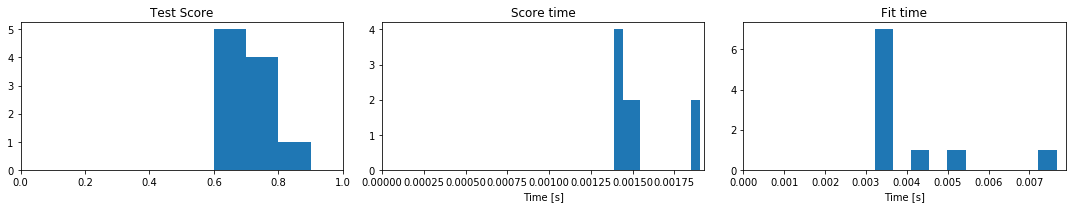

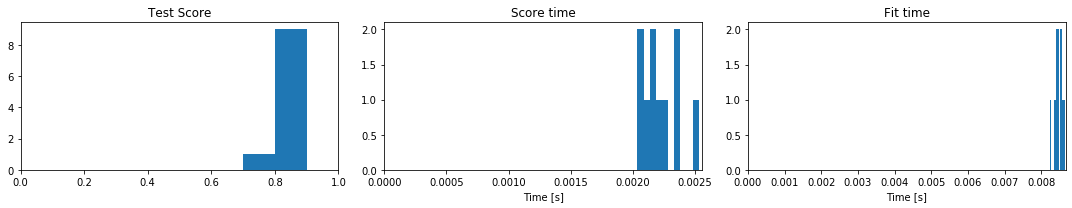

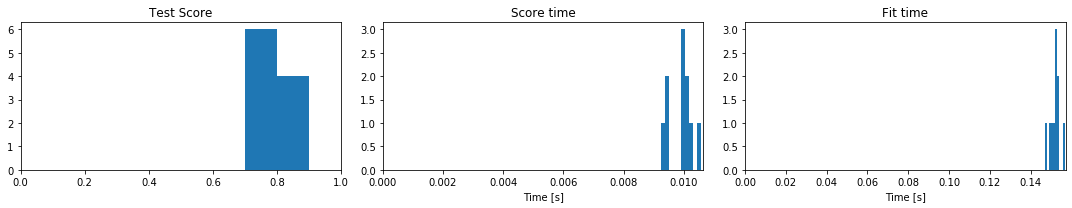

In [0]:
# Cross validation variables
cv_spliter = 10
scoring= 'f1'

# Cross validating
tree_cv_results = cross_validate(tree,
                                 X_train, y_train,
                                 scoring=scoring,
                                 cv=cv_spliter)

svc_cv_results = cross_validate(svc,
                                X_train, y_train,
                                scoring=scoring,
                                cv=cv_spliter)

random_forest_cv_results = cross_validate(random_forest,
                                          X_train, y_train,
                                          scoring=scoring,
                                          cv=cv_spliter)

# Show Results
show_results(tree_cv_results)
show_results(svc_cv_results)
show_results(random_forest_cv_results)

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer**: Before using GridSearch and with default parameters, the SVC showed better results, with similar results in F<sub>1</sub> score  between train and test data. The other models used, otherwise, clearly presented overfitting, with a huge difference in F<sub>1</sub> score between train and test data.

Because of it, we will try to tune all the models to solve the problem of overfitting and compare the results again.

## Choosing the Best Model
In this final section, we will perform a grid search optimization for all the models over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

In [0]:
from sklearn.model_selection import GridSearchCV

# Parameters for grid search
param_tree = {'criterion':('gini', 'entropy'),
              'max_depth':list(range(1,20,2)),
              'min_samples_split':list(range(3,50,5)),
              'max_features':('auto', 'sqrt', 'log2')}

param_svc = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
             'shrinking':(True, False)} 

param_random_forest = {'n_estimators': list(range(5,50,10)),
                      'criterion': ('gini', 'entropy'),
                      'random_state': [42]} 

# Call GridSearchCV for all models
search_tree = GridSearchCV(tree, 
                           param_grid=param_tree,
                           cv=cv_spliter)

search_svc = GridSearchCV(svc,
                          param_grid=param_svc)

search_random_forest = GridSearchCV(random_forest,
                                    param_grid=param_random_forest,
                                    cv=cv_spliter)

# Finding the model with the best set of parameters
best_tree = search_tree.fit(X_train, y_train).best_estimator_
best_svc = search_svc.fit(X_train, y_train).best_estimator_
best_random_forest = search_random_forest.fit(X_train, y_train).best_estimator_

# Make cross validade with the best models
best_tree_cv_results = cross_validate(best_tree,
                                      X_train, y_train,
                                      scoring=scoring,
                                      cv=cv_spliter)

best_svc_cv_results = cross_validate(best_svc,
                                     X_train, y_train,
                                     scoring=scoring,
                                     cv=cv_spliter)

best_random_forest_cv_results = cross_validate(best_random_forest,
                                               X_train, y_train,
                                               scoring=scoring,
                                               cv=cv_spliter)


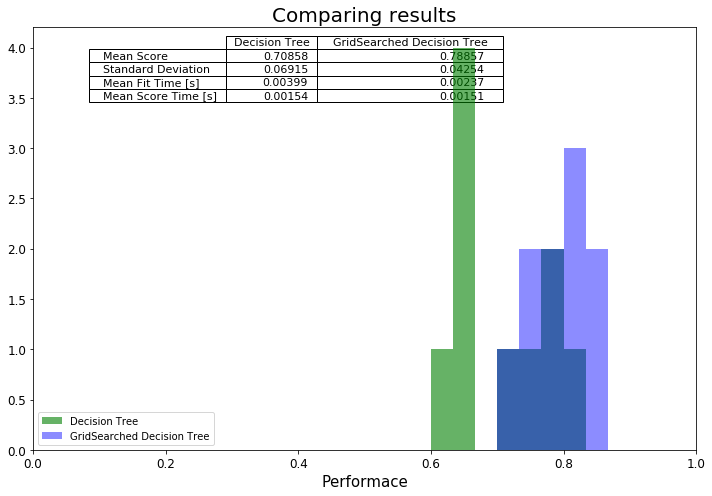

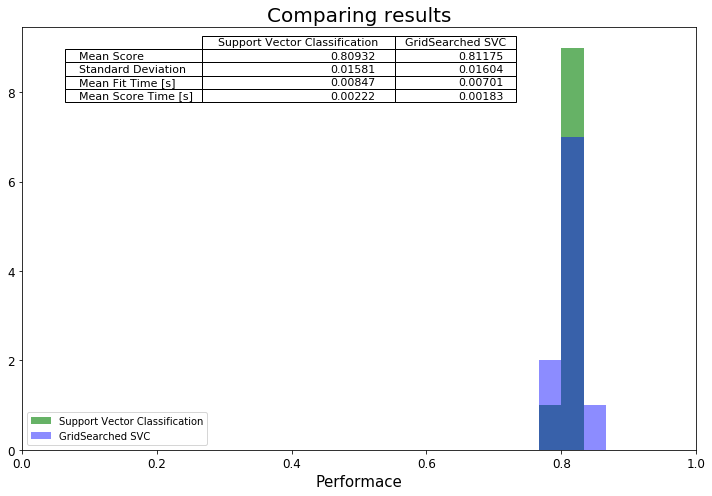

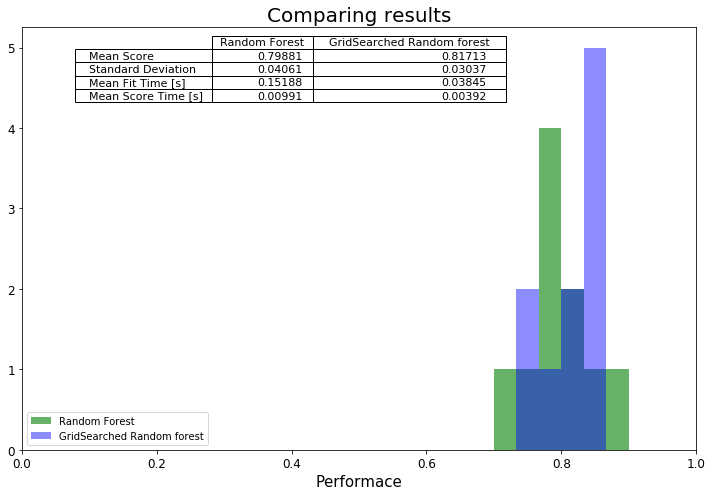

In [0]:
compare_results(cv1=tree_cv_results,
                cv2=best_tree_cv_results,
                cv1_name='Decision Tree',
                cv2_name='GridSearched Decision Tree')

compare_results(cv1=svc_cv_results,
                cv2=best_svc_cv_results,
                cv1_name='Support Vector Classification',
                cv2_name='GridSearched SVC')

compare_results(cv1=random_forest_cv_results,
                cv2=best_random_forest_cv_results,
                cv1_name='Random Forest',
                cv2_name='GridSearched Random forest')

From charts, we can see that Random Forest has the best score, so we will test on the training data to see if the model is overfitting again.

In [0]:
predicted = best_random_forest.predict(X_train)
f1_score(y_true=y_train,
         y_pred=predicted)

1.0

In [0]:
predicted = best_tree.predict(X_train)
f1_score(y_true=y_train,
         y_pred=predicted)

0.8387096774193549

In [0]:
predicted = best_svc.predict(X_train)
f1_score(y_true=y_train,
         y_pred=predicted)

0.8316430020283976

**Answer:** As we can see, the Random Forest model is overfitting the trainning data, so it isn't a good model to generalizate our data.

Otherwise, Decision Tree and SVC have the results inside the expected range values obtained on cross validation test.

Comparing the two results between Decision Tree and SVC, we have noticed similar results between the models, so we will decide for the simplest one, **Decision Tree**.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer:** The model will look for the most significant features that determines if a student will fail or pass and create branches that split the students into two groups according to his own characteristics.



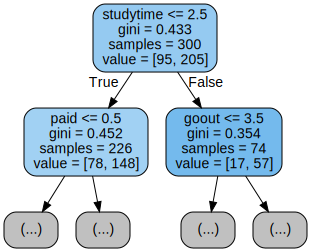

In [0]:
import graphviz

dot_data = export_graphviz(best_tree, max_depth=1,
                           feature_names=X_all.columns,
                           rounded=True, filled=True)
graphviz.Source(dot_data)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

In [0]:
predicted = best_tree.predict(X_test)
final_score = f1_score(y_true=y_test,
                       y_pred=predicted)

print('Final F1 score: {}'.format(final_score))

Final F1 score: 0.7682119205298011


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.